In [1]:
#In[]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
# import statsmodels.api as sm
from tqdm import tqdm
# from multiprocessing.dummy import Pool
import dask.dataframe as dd
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.max_columns', 500)

In [28]:
#In[] 1,227,297,915 size, 7675it * 10000
crsp_df = pd.read_csv("crsp_d.csv",header=0,
             parse_dates = ['date','DCLRDT','RCRDDT'],
             dtype={
                  "PERMNO": str,
                  "PRC": np.float64,
                  "VOL": np.float64,
                  "SHROUT": np.float64,
                  "DIVAMT": np.float64,
                  "SHRCD":str,
                  "DISTCD":str,
                  "COMNAM": str,
                  "TICKER": str,
                   'CUSIP': str,
                   "BID": np.float64,
                   "ASK": np.float64}, chunksize=100000)
#Data Preprocessing
#In[]
d = {}
one = False
def insert(i,x):
     if str(x)[-1].isdigit() == False:
          return
     x = float(x)
     if i not in d:
          d[i] = [x]
     else:
          d[i].append(x)
     return

for c in tqdm(crsp_df):
     c = c[(c.SHRCD.isin(('10','11'))) ]
     c = c.groupby(by=['CUSIP','date']).agg({
          'DCLRDT': 'last',
          'RCRDDT': 'last',
          'DISTCD': 'last',
          'DIVAMT': 'sum',
          'RET':'last',
          'RETX':'last',
          'PRC': 'last'}).reset_index()
     if not one:
          cusip = c.head(1).reset_index().iloc[0].CUSIP
          one = True
     count = 0
     # c['dt'] = 0
     lastDivDate = None
     for row in c.itertuples():
          if row.CUSIP != cusip:
               cusip = row.CUSIP
               # row.dt = 0
               count = 0
               lastDivDate = None
          else:
               if pd.isna(row.DCLRDT) == False:
                    lastDivDate = True
                    count = 0
                    insert(count, row.RET)
                    count += 1
               else:
                    if lastDivDate is None:
                         # row.dt = 0
                         count = 0
                    else:
                         # row.dt = count
                         insert(count, row.RET)
                         count += 1

819it [20:25,  1.50s/it]


In [3]:
#In[]
crsp_rev_df = pd.read_csv("crsp_d_rev2.csv",header=0,
             parse_dates = ['date','DCLRDT','RCRDDT'],
             dtype={
                  "PERMNO": str,
                  "PRC": np.float64,
                  "VOL": np.float64,
                  "SHROUT": np.float64,
                  "DIVAMT": np.float64,
                  "SHRCD":str,
                  "DISTCD":str,
                  "COMNAM": str,
                  "TICKER": str,
                   'CUSIP': str,
                   "BID": np.float64,
                   "ASK": np.float64}, chunksize=100000)
one = False
for c in tqdm(crsp_rev_df):
     c = c[(c.SHRCD.isin(('10','11'))) ]
     c = c.groupby(by=['CUSIP','date']).agg({
          'DCLRDT': 'last',
          'RCRDDT': 'last',
          'DISTCD': 'last',
          'DIVAMT': 'sum',
          'RET':'last',
          'RETX':'last',
          'PRC': 'last'}).reset_index()
     if not one:
          cusip = c.head(1).reset_index().iloc[0].CUSIP
          one = True
     count = 0
     # c['dt'] = 0
     lastDivDate = None
     for row in c.itertuples():
          if row.CUSIP != cusip:
               cusip = row.CUSIP
               # row.dt = 0
               count = 0
               lastDivDate = None
          else:
               if pd.isna(row.DCLRDT) == False:
                    lastDivDate = True
                    count = 0
                    # insert(count, row.RET)
                    count += 1
               else:
                    if lastDivDate is None:
                         # row.dt = 0
                         count = 0
                    else:
                         # row.dt = count
                         insert(count * -1 , row.RET)
                         count += 1


723it [30:40,  3.40s/it]C:\Users\kobe\anaconda3\envs\fina4359\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
819it [36:19,  2.66s/it]


In [4]:
x = range(-30, 61, 1)
dlist = [ 100*sum(d[key])/len(d[key]) for key in x ]
print(dlist)

[0.03841678620439709, 0.03183833684199658, 0.05617939727951849, 0.059929092179959766, 0.07250313452250527, 0.06061814107725825, 0.061127461403346975, 0.07481496215567796, 0.07280931939797648, 0.07380911433155923, 0.043265708020878736, 0.046268550849606856, 0.06468390147060647, 0.0742353914514392, 0.08425620456355906, 0.04352419749854744, 0.07413957222072956, 0.07877663561951757, 0.08556603600602461, 0.06628028970059023, 0.028999237383457884, 0.04944207729685674, 0.03889874963826322, 0.048068000608263106, 0.04227299482092402, 0.0011958425112187814, 0.0653860915961109, 0.068139334542773, 0.06648273717877232, 0.07598358264420277, -0.44392535896660595, 0.07600208326107542, 0.06644890773178422, 0.06814312655419677, 0.06546920316507127, 0.001160491470329057, 0.04230286985506258, 0.04802486949498257, 0.038978106288920254, 0.04942777906793792, 0.02904811538413466, 0.06628295824199922, 0.08553056223571638, 0.07887690661649364, 0.07426375331348414, 0.043586598669935715, 0.08424108144899178, 0.07

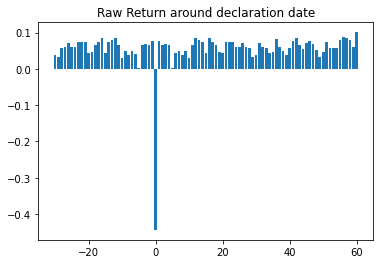

In [8]:
plt.bar(x,dlist)
plt.title('Raw Return around declaration date')
plt.show()

In [11]:
sum(d[0])

-1793.4895250002157

In [27]:
# c[c.DCLRDT.notna()]
# c[c.CUSIP=='05978R10'][4000:4500]

,CUSIP,date,DCLRDT,RCRDDT,DISTCD,DIVAMT,RET,RETX,PRC
6479,05978R10,2001-11-13,NaT,NaT,None,0.000,-0.010526,-0.010526,9.400
6480,05978R10,2001-11-14,NaT,NaT,None,0.000,-0.021277,-0.021277,9.200
6481,05978R10,2001-11-15,NaT,NaT,None,0.000,0.048913,0.048913,9.650
6482,05978R10,2001-11-16,NaT,NaT,None,0.000,-0.029534,-0.029534,-9.365
6483,05978R10,2001-11-19,NaT,NaT,None,0.000,0.026161,0.026161,9.610
6484,05978R10,2001-11-20,NaT,NaT,None,0.000,-0.042664,-0.042664,9.200
6485,05978R10,2001-11-21,NaT,NaT,None,0.000,-0.001087,-0.001087,9.190
6486,05978R10,2001-11-23,NaT,NaT,None,0.000,0.020131,0.020131,-9.375
6487,05978R10,2001-11-26,NaT,NaT,None,0.000,0.029333,0.029333,9.650
6488,05978R10,2001-11-27,NaT,NaT,None,0.000,-0.015544,-0.015544,9.500


In [6]:
import pickle
filename = 'DCLRDT_Figure3.pkl'
with open(filename,'wb') as f:
     pickle.dump(dlist, f)

In [7]:
with open(filename,'rb') as f:
     a = pickle.load(f)

a == dlist

True